0.11293824972675794
0.01226740102904371
0.0938096382728547
0.009262073610238137
0.40123743304422665
0.041224279574892234
0.40493839466080334
0.019640130500072135


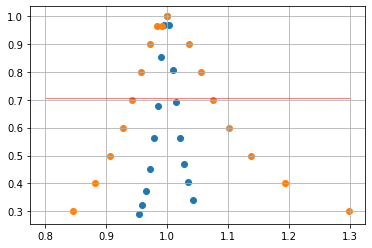

In [5]:
import matplotlib.pyplot as plt
import numpy as np

nu = [1588, 1581, 1571, 1561, 1552, 1541, 1531, 1522, 1601, 1596, 1612, 1620, 1630, 1640, 1651, 1663]
v = [30, 26.5, 21, 17.5, 14, 11.5, 10, 9, 30, 31, 25, 21.5, 17.5, 14.5, 12.5, 10.5]

for i in range(len(v)):
    nu[i] /= 1596
    v[i] /= 31
    
fig, ax = plt.subplots()

plt.scatter(nu, v)

nu_100 = [1597, 1583, 1571, 1528, 1505, 1480, 1447, 1407, 1349, 1553, 1653, 1685, 1718, 1759, 1817, 1905, 2073]
u_100 = [3, 2.9, 2.9, 2.4, 2.1, 1.8, 1.5, 1.2, 0.9, 2.7, 2.7, 2.4, 2.1, 1.8, 1.5, 1.2, 0.9]

for i in range(len(u_100)):
    nu_100[i] /= 1597
    u_100[i] /= 3
    
plt.scatter(nu_100, u_100)

n = [0] * 4
u = [0] * 4

n[0] = [0, 2, 10, 19, 12, 4, 7]
u[0] = [1.12, 0.2, 0.72, 1, 0.8, 0.38, 0.58]

n[1] = [0, 2, 4, 7, 12, 19, 27]
u[1] = [1.12, 1, 0.78, 0.6, 0.38, 0.2, 0.1]

n[2] = [0, 1, 2, 3, 4, 5, 6]
u[2] = [280, 65, 135, 185, 215, 240, 250]

n[3] = [0, 1, 2, 3, 4, 5, 6]
u[3] = [280, 230, 150, 100, 70, 45, 30]

for i in range(len(u[1])-1):
    u[1][i+1] = u[1][0] - u[1][i+1]
for i in range(len(u[3])-1):
    u[3][i+1] = u[3][0] - u[3][i+1]

theta = [[], [], [], []]
avg_theta = [0] * 4
sigma_theta = [0] * 4

for k in range(4):
    for i in range(len(n[k]) - 1):
        for j in range(len(n[k]) - i - 2):
            theta[k].append(np.abs(np.log((u[k][0] - u[k][i+1]) / (u[k][0] - u[k][j+i+2])) / (n[k][j+i+2] - n[k][i+1])))
            avg_theta[k] += theta[k][-1] 
        
    avg_theta[k] /= len(theta[k])
    print(avg_theta[k])
    for i in range(len(theta[k])):
        sigma_theta[k] += (avg_theta[k] - theta[k][i]) **2
    sigma_theta[k] /= (len(theta[k])-1) 
    print(np.sqrt(sigma_theta[k]))
    
ax.grid()
ax.hlines(0.707, 0.8, 1.3, color = 'red', linewidth = 0.5)